<a href="https://colab.research.google.com/github/Raghuram1999/IT1703/blob/main/Assignment2_RaghuramReddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Loading the data and checking column types

In [22]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
dataframe = pd.read_csv('auto-mpg.csv')

# Check column types
print(dataframe.dtypes)

# Convert 'horsepower' to numeric, replacing '?' with NaN
dataframe['horsepower'] = pd.to_numeric(dataframe['horsepower'], errors='coerce')

# Convert 'origin' to categorical
dataframe['origin'] = dataframe['origin'].astype('category')

print("\nUpdated column types:")
print(dataframe.dtypes)
dataframe.head()

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Updated column types:
mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#2) Splitting the data

In [23]:
# Split the data
from sklearn.model_selection import train_test_split
X = dataframe.drop('mpg', axis=1)
y = dataframe['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)
X_train.describe()

Shape of training data: (298, 8)
Shape of testing data: (100, 8)


,cylinders,displacement,horsepower,weight,acceleration,model year
count,298.000000,298.000000,293.000000,298.000000,298.000000,298.000000
mean,5.449664,192.817114,103.211604,2978.704698,15.657718,76.077181
std,1.677485,101.770675,36.860385,834.131101,2.771371,3.577532
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,105.000000,76.000000,2227.000000,13.900000,73.000000
50%,4.000000,151.000000,92.000000,2880.000000,15.500000,76.000000
75%,6.000000,259.500000,122.000000,3608.000000,17.300000,79.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000


#3) Visualizing the data

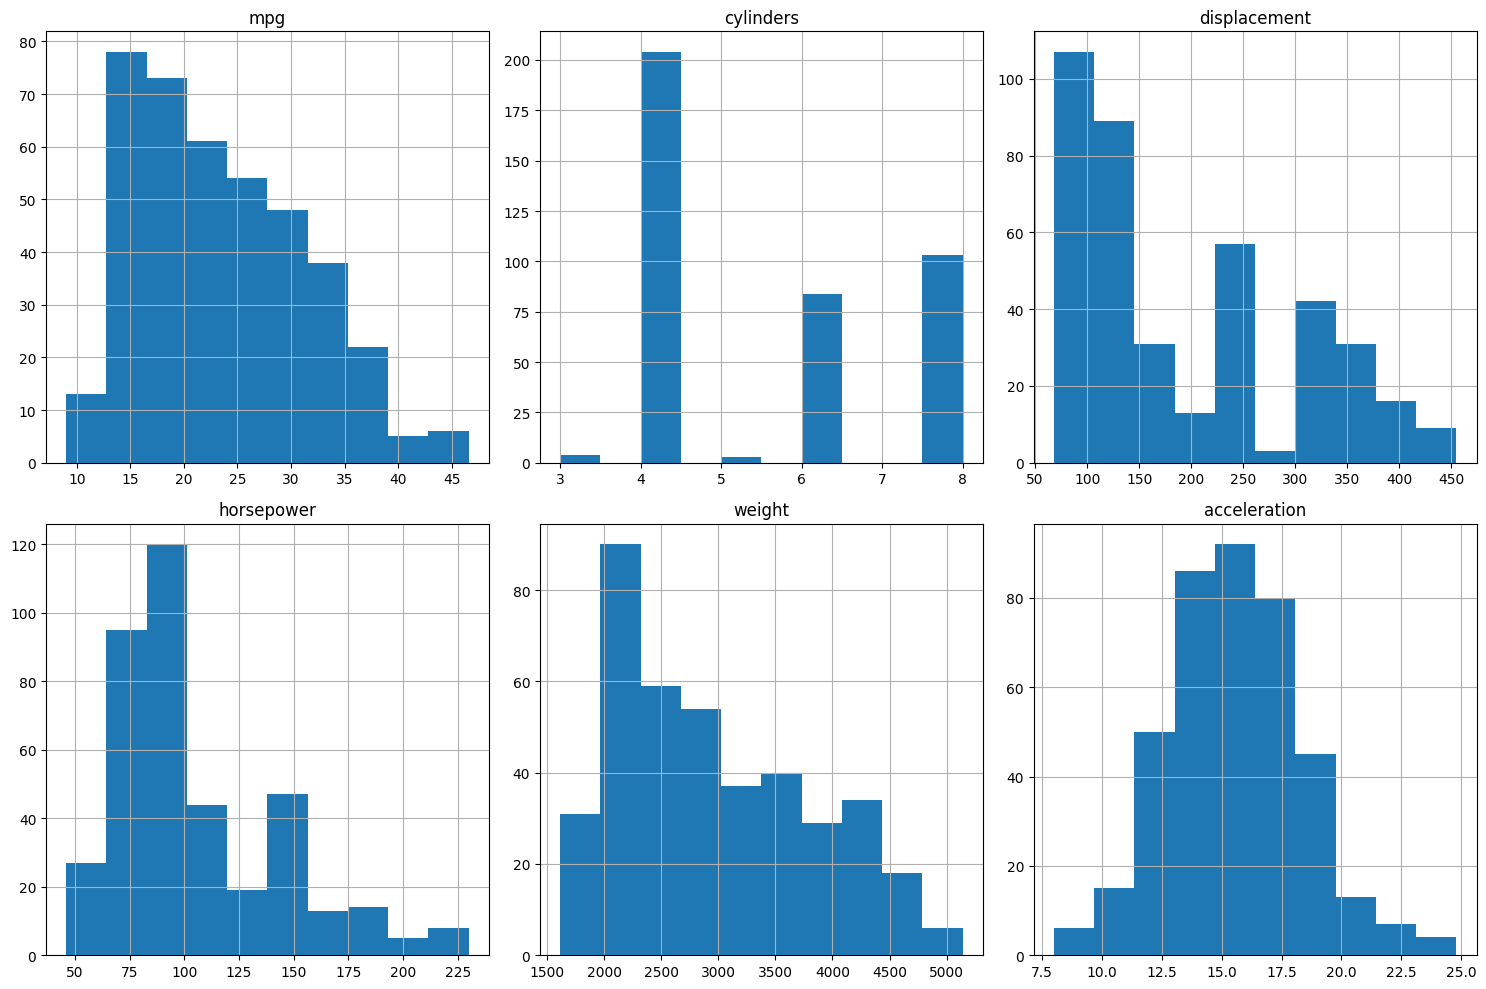

Skewness of numeric columns:
mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
dtype: float64


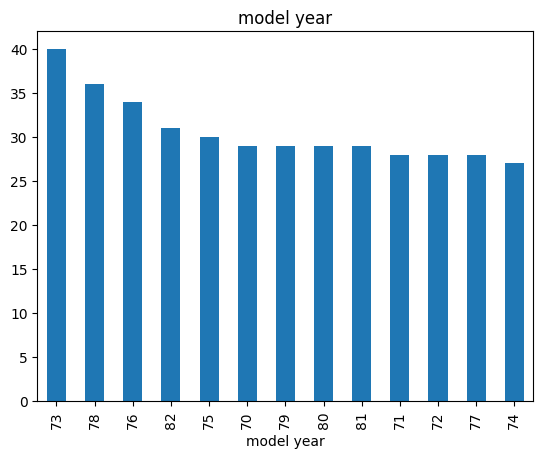

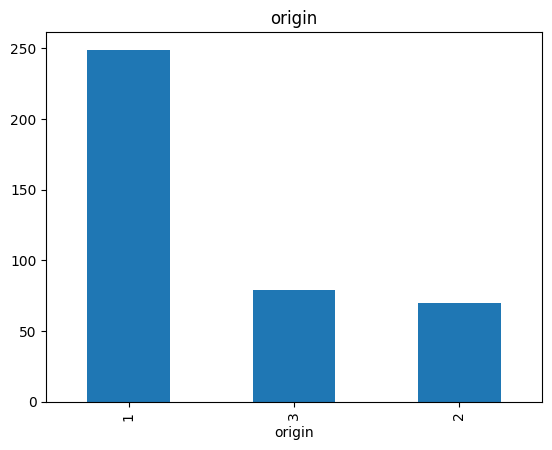

In [26]:
# Function to plot histograms
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
def plot_histograms(data, columns, ncols=3):
    nrows = (len(columns) - 1) // ncols + 1
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))
    for i, col in enumerate(columns):
        ax = axes[i // ncols, i % ncols] if nrows > 1 else axes[i % ncols]
        data[col].hist(ax=ax)
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

# Numeric columns
numeric_cols = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
plot_histograms(dataframe, numeric_cols)

# Check for skewness
print("Skewness of numeric columns:")
print(dataframe[numeric_cols].skew())

# Categorical columns
categorical_cols = ['model year', 'origin']
for col in categorical_cols:
    dataframe[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

#4) Building the pipeline

In [25]:
# Define column transformers
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
numeric_symmetric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# Combine transformers
preprocessor = ColumnTransformer([
    ('num_sym', numeric_symmetric_transformer, ['cylinders', 'displacement', 'horsepower', 'weight']),
    ('num_skew', numeric_skewed_transformer, ['acceleration']),
    ('cat', categorical_transformer, ['model year', 'origin'])
])

# Print the preprocessor
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num_sym',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['cylinders', 'displacement', 'horsepower',
                                  'weight']),
                                ('num_skew',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['acceleration']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['model year', 'origin'])])

#5) Training the pipeline and transforming the data:

In [ ]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#6) Printing the shapes of processed data:

In [ ]:
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

Shape of processed training data: (298, 19)
Shape of processed testing data: (100, 19)
